In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pickle

40 participants watched 16 short videos (duration <250 seconds)

for each participant 94 clips were recorded (40 * 94 = 3760 clips in total)

Each physiological signal is made up of 640 instances (40 participants * 16 videos), but at the time of consolidating the data frame, null values were found, therefore, it was reduced to 603 instances

Once the physiological signals have been preprocessed, it is defined a segment of length of 200 R peaks for the input vector of the ECG signal (not sure how such length was obtained, signal for one video has ~30 R peaks)

"Therefore, in figure 3, it is shown the system with the components to load the dataset in a data frame, as a requirement for the preprocessing of the ECG and GSR signals. Then, the feature extraction stage can be developed explicitly or implicitly. The first uses hand-crafted functions to obtain features in the time or frequency domain, which can be selected with machine learning algorithms. The second, with deep learning, extracts automatic representations of the features. Finally, the models are trained and tested with algorithms from the two approaches."

The code below was used (locally) to prepare input data files with serialized variables.
Available here only for informational purpose (do not run these code in colab)

In [ ]:
'''
# general parameters
participants = 40
sampling = 128 #Hz
init_time = 5 #s
clip_time = 20 #s
# 5s with sampling 128Hz is 128*5 samples
init_interval = sampling * init_time
# 20s with sampling 128Hz is 128*20 samples
clip_interval = sampling * clip_time
# number of clips per consequtive films
clips = [6, 4, 7, 5, 8, 5, 7, 5, 9, 5, 5, 6, 7, 4, 6, 5]
# arousal of consequtive films
arousal = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
# valence of consequtive films
valence = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
max_clips = max(clips)
intervals_list = [init_interval]
# intervals list creation -> list with number of samples, which occurs every clip_time
# first sample on the list corresponds to init_interval time
for i in range(max_clips-2):
    intervals_list.append(intervals_list[-1]+clip_interval)

for i in range(participants):
    # prepare filename for (i+1)th participant
    filename_mat = 'Data_Preprocessed_P0' + str(i+1) + '.mat' if i<9 else 'Data_Preprocessed_P' + str(i+1) + '.mat'
    filename_pickle = 'Data_Preprocessed_P0' + str(i+1) + '_dict.p' if i<9 else 'Data_Preprocessed_P' + str(i+1) + '_dict.p'
    
    # read matlab file with filename
    Data_Preprocessed = loadmat(filename_mat)
    print(i+1)
    print(type(Data_Preprocessed))
    print(Data_Preprocessed.keys(), "\n")
    
    # initialize variables
    Data_Preprocessed_ECG = []
    Data_Preprocessed_ECG_labels = []
    Data_Preprocessed_dict = {}
    
    # fill list with data by cutting signal in samples from intervals list
    # Data_Preprocessed_ECG contains signal fragment with duration of clip_time
    # Data_Preprocessed_ECG_labels contains labels for consequtive signal fragment in a form of list [arousal, valence]
    # 1 for HIGH arousal/valence and 0 for LOW arousal/valence
    for i, c, a, v in zip(Data_Preprocessed['joined_data'][0], clips, arousal, valence):
        for j in range(c-2):
            Data_Preprocessed_ECG.append(i.T[14][intervals_list[j]:intervals_list[j+1]])
            Data_Preprocessed_ECG_labels.append([a, v])
    
    # pack data to dictionary
    Data_Preprocessed_dict['Data_Preprocessed_ECG'] = Data_Preprocessed_ECG
    Data_Preprocessed_dict['Data_Preprocessed_ECG_labels'] = Data_Preprocessed_ECG_labels  
        
    pickle.dump( Data_Preprocessed_dict, open( filename_pickle, "wb" ) )
    Data_Preprocessed_dict = pickle.load( open( filename_pickle, "rb" ) )

    print(len(Data_Preprocessed_dict['Data_Preprocessed_ECG']))
'''

Loading data files from github repositiory.
It takes some times, do not run, if not needed).

In [ ]:
# number of participants
participants = 40
# initialize variable with signals
Data_Preprocessed_ECG = []
# initialize variable with labels
Data_Preprocessed_ECG_labels = []

for i in range(participants):
    # prepare filename for (i+1)th participant
    filename_pickle = 'Data_Preprocessed_P0' + str(i+1) + '_dict_GSR.p' if i<9 else 'Data_Preprocessed_P' + str(i+1) + '_dict_GSR.p'

    # download file from github
    # raw=true is important so you download the file rather than the webpage
    link = "https://github.com/katarzynapi/emotion_recognition/blob/master/GSR/" + filename_pickle + "?raw=true"
    !wget "$link" -O "$filename_pickle"
    # rename the file
    #path = filename_pickle + "\?raw\=true"
    #!mv "$path" "$filename_pickle"
    # deserialize variable
    Data_Preprocessed_dict = pickle.load(open( filename_pickle, "rb" ))

    # append new data to dataset
    Data_Preprocessed_ECG += Data_Preprocessed_dict['Data_Preprocessed_ECG']
    Data_Preprocessed_ECG_labels += Data_Preprocessed_dict['Data_Preprocessed_ECG_labels']

    # list of 20sec signals for the (i+1)th participant
    print(i+1)
    print('Data_Preprocessed_ECG: ', len(Data_Preprocessed_dict['Data_Preprocessed_ECG']))
    # list of arousal and valence labels corresponding to signals from the list above
    # list elements are the following [a, v]
    # 0 - LOW, 1 - HIGH
    print('Data_Preprocessed_ECG_labels: ', len(Data_Preprocessed_dict['Data_Preprocessed_ECG_labels']))

--2020-08-16 12:34:57--  https://github.com/katarzynapi/emotion_recognition/blob/master/GSR/Data_Preprocessed_P01_dict_GSR.p?raw=true
Resolving github.com (github.com)... 13.229.188.59
Connecting to github.com (github.com)|13.229.188.59|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/katarzynapi/emotion_recognition/raw/master/GSR/Data_Preprocessed_P01_dict_GSR.p [following]
--2020-08-16 12:34:58--  https://github.com/katarzynapi/emotion_recognition/raw/master/GSR/Data_Preprocessed_P01_dict_GSR.p
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/katarzynapi/emotion_recognition/master/GSR/Data_Preprocessed_P01_dict_GSR.p [following]
--2020-08-16 12:34:58--  https://raw.githubusercontent.com/katarzynapi/emotion_recognition/master/GSR/Data_Preprocessed_P01_dict_GSR.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151

In [ ]:
print(len(Data_Preprocessed_ECG))
print(len(Data_Preprocessed_ECG_labels))

2480
2480


**Data_Preprocessed_ECG** - 2d numpy array with ECG signal fragments (20sec -> 2560 samples each).

**Data_Preprocessed_ECG_labels** - 2d numpy array with labels for each ECG fragment in **Data_Preprocessed_ECG**. Every label is a 2-element array, First element related to arousal (0-LOW, 1-HIGH) and second to valence (0-LOW, 1-HIGH).

First 5sec of every video were omitted, as it was baseline. Then 20sec clips were collected.

In [ ]:
# disjoining labels array into two parts - valence and arousal (for testing purpose)
print(len(Data_Preprocessed_ECG))
Data_Preprocessed_ECG = np.array(Data_Preprocessed_ECG)
print(len(Data_Preprocessed_ECG_labels))
Data_Preprocessed_ECG_labels = np.array(Data_Preprocessed_ECG_labels)

Data_Preprocessed_ECG_labels_arousal = np.array([a_v[0] for a_v in Data_Preprocessed_ECG_labels])
Data_Preprocessed_ECG_labels_valence = np.array([a_v[1] for a_v in Data_Preprocessed_ECG_labels])

2480
2480


Deleting signal fragments with NaN

In [ ]:
Data_Preprocessed_ECG_no_nan = Data_Preprocessed_ECG[~np.isnan(Data_Preprocessed_ECG).any(axis=1)]
Data_Preprocessed_ECG_labels_no_nan = Data_Preprocessed_ECG_labels[~np.isnan(Data_Preprocessed_ECG).any(axis=1)]
Data_Preprocessed_ECG_labels_arousal_no_nan = Data_Preprocessed_ECG_labels_arousal[~np.isnan(Data_Preprocessed_ECG).any(axis=1)]
Data_Preprocessed_ECG_labels_valence_no_nan = Data_Preprocessed_ECG_labels_valence[~np.isnan(Data_Preprocessed_ECG).any(axis=1)]

print(len(Data_Preprocessed_ECG_no_nan))
print(len(Data_Preprocessed_ECG_labels_arousal_no_nan))
print(len(Data_Preprocessed_ECG_labels_valence_no_nan))

2480
2480
2480


Display some ECG fragments

0


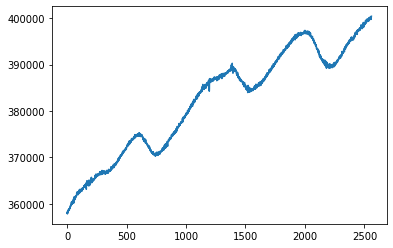

1


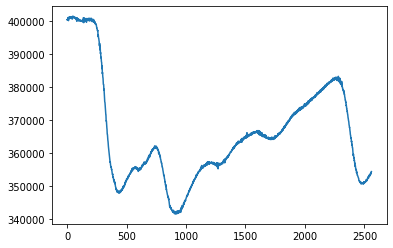

2


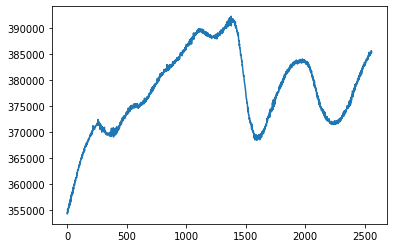

3


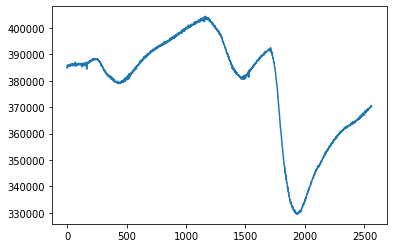

4


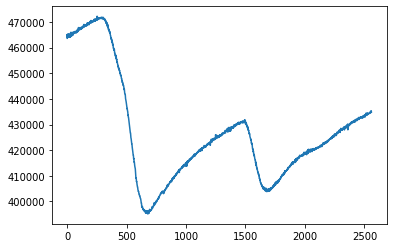

In [ ]:
for i in range(5):
  print(i)
  plt.plot(Data_Preprocessed_ECG[i])
  plt.show()

Hamming window application (optional)

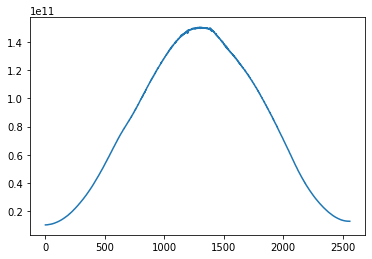

In [ ]:
# optional code
hamming_window = np.hamming(len(Data_Preprocessed_ECG_no_nan[0]))
for i in Data_Preprocessed_ECG_no_nan:
  i *= i*hamming_window
plt.plot(Data_Preprocessed_ECG_no_nan[0])
plt.show()

Normalization to mean value for each row separately

In [ ]:
from sklearn import preprocessing

Data_Preprocessed_ECG_normalized = []
for i in range(len(Data_Preprocessed_ECG_no_nan)):
  Data_Preprocessed_ECG_normalized.append(preprocessing.scale(Data_Preprocessed_ECG_no_nan[i]))
Data_Preprocessed_ECG_normalized = np.asarray(Data_Preprocessed_ECG_normalized)

Normalization to mean of the whole data

In [ ]:
#from sklearn import preprocessing
#Data_Preprocessed_ECG_normalized = preprocessing.scale(Data_Preprocessed_ECG_no_nan)
#Data_Preprocessed_ECG_normalized = np.asarray(Data_Preprocessed_ECG_normalized)

Examplary signal after normalization

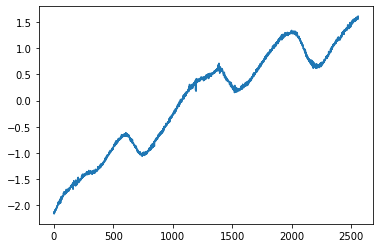

In [ ]:
plt.plot(Data_Preprocessed_ECG_normalized[0])
plt.show()

Expand dimensions to meet neural network input shape requirements (based on https://stackoverflow.com/questions/43396572/dimension-of-shape-in-conv1d )


In [ ]:
Data_Preprocessed_ECG_normalized = np.expand_dims(Data_Preprocessed_ECG_normalized, axis=2)

Neural network architecture from (Pyakillya) article, which is mentioned in the main article.

In current case, we use CNN 1D with the following architecture:

*   7 convolutional layers with filter width 5 and 128 neurons + max-pooling and dropout after every layer
*   GlovalAveragePooling
*   3 FCN layers with (256/128/64) neurons + dropout after every layer
*   softmax layer with 4 outputs

(The reason of 4 outputs is ECG signal classification to 4 classes, not emotion recognition)

From main article:

The DCNN involves a sequence of CNN layers and pooling layers to automatically extract features from the physiological signals. Fully connected layers are located in front of CNN, operate on all nodes and are used to predict the affective state.

In the CNN layers and fully connected layers, the activation function of the Rectified Linear Unit (ReLU) is set

The max-pooling layers are alternated between the CNN layers

As a regularization technique to decrease the overfitting in the layers of the neural network, the dropout with a value of 0.5 is added (where exactly? how many?)

The output layers of the fully connected network are configured with the softmax classifier

CNN architecture:
- Input layer that connects the vector of physiological features with the neurons of the first convolutional layer

- Three consecutive convolutional layers, to extract the features of the ECG and GSR signals

- Three FCN, to perform the training and testing

- Last FCN layer is used to predict the affective state

For the ECG vector, the kernel size for the four convolutional layers is defined at 15, 10, 5 and 1. In GSR vector, it was configured at 10, 3, 1 and 1. The max-poling sizes were defined in 5, 2, 2 and 2,1,1 respectively for the ECG and GSR signals. Kernel filter sizes were set to 256. The epochs number used to train the model was 200.

**1) CNN with 2 outputs -> for valence and arousal**

In [ ]:
input_shape = (2560, 1)

#ECG
'''
net_ECG = models.Sequential()
net_ECG.add(layers.Conv1D(256, 15, activation='relu', input_shape=input_shape))
net_ECG.add(layers.MaxPooling1D(5))
net_ECG.add(layers.Conv1D(256, 10, activation='relu'))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 5, activation='relu'))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 1, activation='relu'))
net_ECG.add(layers.GlobalAveragePooling1D())
net_ECG.add(layers.Dropout(0.5))
net_ECG.add(layers.Dense(256, activation='relu'))
net_ECG.add(layers.Dense(128, activation='relu'))
net_ECG.add(layers.Dense(64, activation='relu'))
net_ECG.add(layers.Dense(2, activation='softmax'))
'''
#GSR
net_ECG = models.Sequential()
net_ECG.add(layers.Conv1D(256, 10, activation='relu', input_shape=input_shape))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 3, activation='relu'))
net_ECG.add(layers.MaxPooling1D(1))
net_ECG.add(layers.Conv1D(256, 3, activation='relu'))
net_ECG.add(layers.MaxPooling1D(1))
net_ECG.add(layers.Conv1D(256, 1, activation='relu'))
net_ECG.add(layers.GlobalAveragePooling1D())
net_ECG.add(layers.Dropout(0.5))
net_ECG.add(layers.Dense(256, activation='relu'))
net_ECG.add(layers.Dense(128, activation='relu'))
net_ECG.add(layers.Dense(64, activation='relu'))
net_ECG.add(layers.Dense(2, activation='softmax'))

net_ECG.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 2551, 256)         2816      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1275, 256)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1273, 256)         196864    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1273, 256)         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1271, 256)         196864    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1271, 256)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1271, 256)        

During the supervised training, the loss is minimized with the Root Mean Square Propogation (RMSProp) optimizer, since it adjusts the learning rate adaptively. Initially, the learning rate is set to 0.001 (default in Keras).

In [ ]:
net_ECG.compile(optimizer='RMSprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Pyakillya: the batch size was equal to 256

In [ ]:
history = net_ECG.fit(x=Data_Preprocessed_ECG_normalized[50:], y=Data_Preprocessed_ECG_labels_no_nan[50:], batch_size=256, epochs=10, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 4s 481ms/step - loss: 0.6966 - accuracy: 0.7042 - val_loss: 0.6885 - val_accuracy: 0.8395
Epoch 2/10
9/9 [==============================] - 3s 386ms/step - loss: 0.6908 - accuracy: 0.8208 - val_loss: 0.6897 - val_accuracy: 0.8395
Epoch 3/10
9/9 [==============================] - 3s 389ms/step - loss: 0.6902 - accuracy: 0.8208 - val_loss: 0.6888 - val_accuracy: 0.8395
Epoch 4/10
9/9 [==============================] - 4s 390ms/step - loss: 0.6905 - accuracy: 0.8208 - val_loss: 0.6878 - val_accuracy: 0.8395
Epoch 5/10
9/9 [==============================] - 4s 392ms/step - loss: 0.6907 - accuracy: 0.8208 - val_loss: 0.6887 - val_accuracy: 0.8395
Epoch 6/10
9/9 [==============================] - 4s 394ms/step - loss: 0.6916 - accuracy: 0.8208 - val_loss: 0.6893 - val_accuracy: 0.8395
Epoch 7/10
9/9 [==============================] - 4s 393ms/step - loss: 0.6903 - accuracy: 0.8208 - val_loss: 0.6883 - val_accuracy: 0.8395
Epoch 8/10
9/9 [====

In [ ]:
test_loss, test_acc = net_ECG.evaluate(Data_Preprocessed_ECG_normalized[:50], Data_Preprocessed_ECG_labels_no_nan[:50]) 
print('test_acc:', test_acc,'\n')

2/2 [==============================] - 0s 46ms/step - loss: 0.6832 - accuracy: 0.8200
test_acc: 0.8199999928474426 



**2) CNN with 1 output -> for valence or arousal**



In [ ]:
input_shape = (2560, 1)

#ECG
'''
net_ECG = models.Sequential()
net_ECG.add(layers.Conv1D(256, 15, activation='relu', input_shape=input_shape))
net_ECG.add(layers.MaxPooling1D(5))
net_ECG.add(layers.Conv1D(256, 10, activation='relu'))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 5, activation='relu'))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 1, activation='relu'))
net_ECG.add(layers.GlobalAveragePooling1D())
net_ECG.add(layers.Dropout(0.5))
net_ECG.add(layers.Dense(256, activation='relu'))
net_ECG.add(layers.Dense(128, activation='relu'))
net_ECG.add(layers.Dense(64, activation='relu'))
net_ECG.add(layers.Dense(1, activation='softmax'))
'''
#GSR
net_ECG = models.Sequential()
net_ECG.add(layers.Conv1D(256, 10, activation='relu', input_shape=input_shape))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 3, activation='relu'))
net_ECG.add(layers.MaxPooling1D(1))
net_ECG.add(layers.Conv1D(256, 3, activation='relu'))
net_ECG.add(layers.MaxPooling1D(1))
net_ECG.add(layers.Conv1D(256, 1, activation='relu'))
net_ECG.add(layers.GlobalAveragePooling1D())
net_ECG.add(layers.Dropout(0.5))
net_ECG.add(layers.Dense(256, activation='relu'))
net_ECG.add(layers.Dense(128, activation='relu'))
net_ECG.add(layers.Dense(64, activation='relu'))
net_ECG.add(layers.Dense(1, activation='softmax'))

net_ECG.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 2551, 256)         2816      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 1275, 256)         0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1273, 256)         196864    
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 1273, 256)         0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 1271, 256)         196864    
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 1271, 256)         0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1271, 256)        

In [ ]:
def my_metric(y_true, y_pred):
  squared_difference = tf.square(y_true - y_pred)
  return tf.reduce_mean(squared_difference, axis=-1)

net_ECG.compile(optimizer='RMSprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

#net_ECG.compile(optimizer='RMSprop',
#                loss='binary_crossentropy',
#                metrics=[my_metric])

In [ ]:
#history = net_ECG.fit(x=Data_Preprocessed_ECG_normalized[50:], y=Data_Preprocessed_ECG_labels_valence_no_nan[50:], batch_size=256, epochs=10, validation_split=0.1)
history = net_ECG.fit(x=Data_Preprocessed_ECG_normalized[50:], y=Data_Preprocessed_ECG_labels_arousal_no_nan[50:], batch_size=256, epochs=10, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 4s 415ms/step - loss: 7.3701 - accuracy: 0.5167 - val_loss: 7.2167 - val_accuracy: 0.5267
Epoch 2/10
9/9 [==============================] - 4s 400ms/step - loss: 7.3701 - accuracy: 0.5167 - val_loss: 7.2167 - val_accuracy: 0.5267
Epoch 3/10
9/9 [==============================] - 4s 404ms/step - loss: 7.3701 - accuracy: 0.5167 - val_loss: 7.2167 - val_accuracy: 0.5267
Epoch 4/10
9/9 [==============================] - 4s 407ms/step - loss: 7.3701 - accuracy: 0.5167 - val_loss: 7.2167 - val_accuracy: 0.5267
Epoch 5/10
9/9 [==============================] - 4s 411ms/step - loss: 7.3701 - accuracy: 0.5167 - val_loss: 7.2167 - val_accuracy: 0.5267
Epoch 6/10
9/9 [==============================] - 4s 414ms/step - loss: 7.3701 - accuracy: 0.5167 - val_loss: 7.2167 - val_accuracy: 0.5267
Epoch 7/10
9/9 [==============================] - 4s 417ms/step - loss: 7.3701 - accuracy: 0.5167 - val_loss: 7.2167 - val_accuracy: 0.5267
Epoch 8/10
9/9 [====

In [ ]:
#test_loss, test_acc = net_ECG.evaluate(Data_Preprocessed_ECG_normalized[:50], Data_Preprocessed_ECG_labels_valence_no_nan[:50])
test_loss, test_acc = net_ECG.evaluate(Data_Preprocessed_ECG_normalized[:50], Data_Preprocessed_ECG_labels_arousal_no_nan[:50]) 
print('test_acc:', test_acc,'\n')

2/2 [==============================] - 0s 9ms/step - loss: 8.5396 - accuracy: 0.4400
test_acc: 0.4399999976158142 



**3) CNN with 2 outputs -> for valence and arousal with mse and mae as loss**

In [ ]:
input_shape = (2560, 1)

#ECG
'''
net_ECG = models.Sequential()
net_ECG.add(layers.Conv1D(256, 15, activation='relu', input_shape=input_shape))
net_ECG.add(layers.MaxPooling1D(5))
net_ECG.add(layers.Conv1D(256, 10, activation='relu'))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 5, activation='relu'))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 1, activation='relu'))
net_ECG.add(layers.GlobalAveragePooling1D())
net_ECG.add(layers.Dropout(0.5))
net_ECG.add(layers.Dense(256, activation='relu'))
net_ECG.add(layers.Dense(128, activation='relu'))
net_ECG.add(layers.Dense(64, activation='relu'))
net_ECG.add(layers.Dense(2, activation='softmax'))
'''
#GSR
net_ECG = models.Sequential()
net_ECG.add(layers.Conv1D(256, 10, activation='relu', input_shape=input_shape))
net_ECG.add(layers.MaxPooling1D(2))
net_ECG.add(layers.Conv1D(256, 3, activation='relu'))
net_ECG.add(layers.MaxPooling1D(1))
net_ECG.add(layers.Conv1D(256, 3, activation='relu'))
net_ECG.add(layers.MaxPooling1D(1))
net_ECG.add(layers.Conv1D(256, 1, activation='relu'))
net_ECG.add(layers.GlobalAveragePooling1D())
net_ECG.add(layers.Dropout(0.5))
net_ECG.add(layers.Dense(256, activation='relu'))
net_ECG.add(layers.Dense(128, activation='relu'))
net_ECG.add(layers.Dense(64, activation='relu'))
net_ECG.add(layers.Dense(2, activation='softmax'))

net_ECG.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 2551, 256)         2816      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 1275, 256)         0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 1273, 256)         196864    
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 1273, 256)         0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 1271, 256)         196864    
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 1271, 256)         0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 1271, 256)        

In [ ]:
def my_metric(y_true, y_pred):
  squared_difference = tf.square(y_true - y_pred)
  return tf.reduce_mean(squared_difference, axis=-1)

net_ECG.compile(optimizer='RMSprop',
                 #loss='mean_absolute_error',
                 loss='mean_squared_error',
                 metrics=['accuracy'])

In [ ]:
history = net_ECG.fit(x=Data_Preprocessed_ECG_normalized[50:], y=Data_Preprocessed_ECG_labels_no_nan[50:], batch_size=256, epochs=10, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 4s 426ms/step - loss: 0.2501 - accuracy: 0.7366 - val_loss: 0.2474 - val_accuracy: 0.8395
Epoch 2/10
9/9 [==============================] - 4s 411ms/step - loss: 0.2493 - accuracy: 0.8208 - val_loss: 0.2485 - val_accuracy: 0.8395
Epoch 3/10
9/9 [==============================] - 4s 414ms/step - loss: 0.2489 - accuracy: 0.8208 - val_loss: 0.2476 - val_accuracy: 0.8395
Epoch 4/10
9/9 [==============================] - 4s 419ms/step - loss: 0.2486 - accuracy: 0.8208 - val_loss: 0.2475 - val_accuracy: 0.8395
Epoch 5/10
9/9 [==============================] - 4s 422ms/step - loss: 0.2489 - accuracy: 0.8208 - val_loss: 0.2478 - val_accuracy: 0.8395
Epoch 6/10
9/9 [==============================] - 4s 426ms/step - loss: 0.2487 - accuracy: 0.8208 - val_loss: 0.2481 - val_accuracy: 0.8395
Epoch 7/10
9/9 [==============================] - 4s 429ms/step - loss: 0.2487 - accuracy: 0.8208 - val_loss: 0.2475 - val_accuracy: 0.8395
Epoch 8/10
9/9 [====

In [ ]:
test_loss, test_acc = net_ECG.evaluate(Data_Preprocessed_ECG_normalized[:50], Data_Preprocessed_ECG_labels_no_nan[:50]) 
print('test_acc:', test_acc,'\n')

2/2 [==============================] - 0s 10ms/step - loss: 0.2456 - accuracy: 0.8200
test_acc: 0.8199999928474426 

